# Import Library First

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train Test Split
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Scoring 
from sklearn.metrics import r2_score

# Mae, untuk melihat rentang meleset data
from sklearn.metrics import mean_absolute_error 


# Getting Data

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# EDA

In [4]:
df = df_train[['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   SalePrice    1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   OverallQual  1460 non-null   int64
 3   YearBuilt    1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


In [5]:
df = df.dropna()
print(df.head())

   SalePrice  GrLivArea  OverallQual  YearBuilt
0     208500       1710            7       2003
1     181500       1262            6       1976
2     223500       1786            7       2001
3     140000       1717            7       1915
4     250000       2198            8       2000


## Regplot

Harusnya makin luas rumah (GrLivArea), harganya (SalePrice) makin mahal dong?

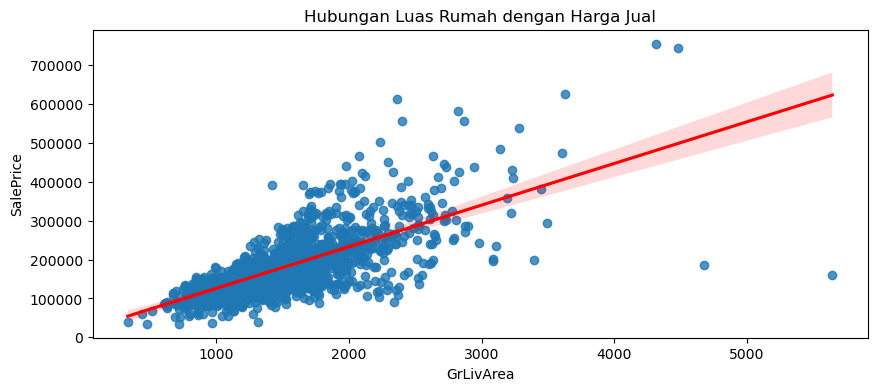

In [6]:
plt.figure(figsize=(10,4))

sns.regplot(x='GrLivArea', y='SalePrice', data=df, line_kws={'color':'red'})
plt.title('Hubungan Luas Rumah dengan Harga Jual')
plt.show()

Memang benar bahwa semakin tinggi Areanya, semakin mahal harganya. Akan tetapi, jika dilihat, persebaran datanya ngacak dan bayangan pada garis tersebut juga makin keatas, semakin besar. Maka dari itu, dapat disimpulkan bahwa terdapat beberapa indikasi yang lain selain luat rumah karena jarak antara data dengan garis lumayan jauh dan juga punya range  yang signifikan. 

NOTE: Tinjau outliers harga rendah tapi tidak signifikan dengan luas rumah

## ScatterPlot

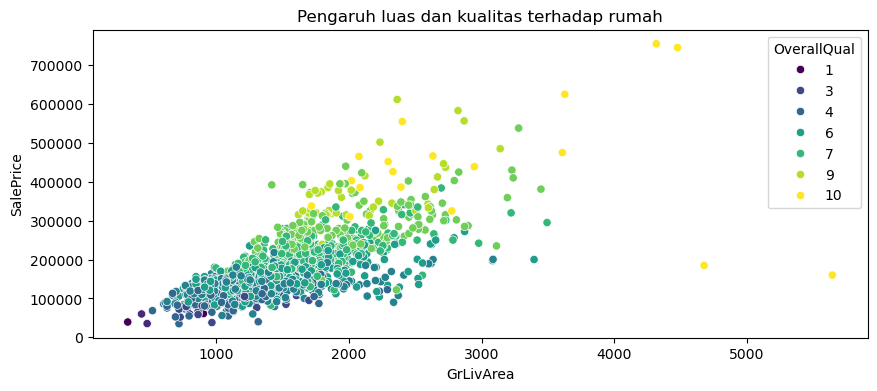

In [7]:
plt.figure(figsize=(10,4))

sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='OverallQual', palette='viridis')
plt.title('Pengaruh luas dan kualitas terhadap rumah')
plt.show()

Jika dilihat dari kualitas keseluruhan, data outliers tersebut berada pada kualitas yang tinggi (10), sehingga tidak mungkin SalePricenya rendah. Maka, kita harus drop row tersebut untuk membereskan garis linearnya.

In [8]:
## Drop Outliers
outliers = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)].index
print(outliers)
df = df.drop(outliers)
print(df)

Index([523, 1298], dtype='int64')
      SalePrice  GrLivArea  OverallQual  YearBuilt
0        208500       1710            7       2003
1        181500       1262            6       1976
2        223500       1786            7       2001
3        140000       1717            7       1915
4        250000       2198            8       2000
...         ...        ...          ...        ...
1455     175000       1647            6       1999
1456     210000       2073            6       1978
1457     266500       2340            7       1941
1458     142125       1078            5       1950
1459     147500       1256            5       1965

[1458 rows x 4 columns]


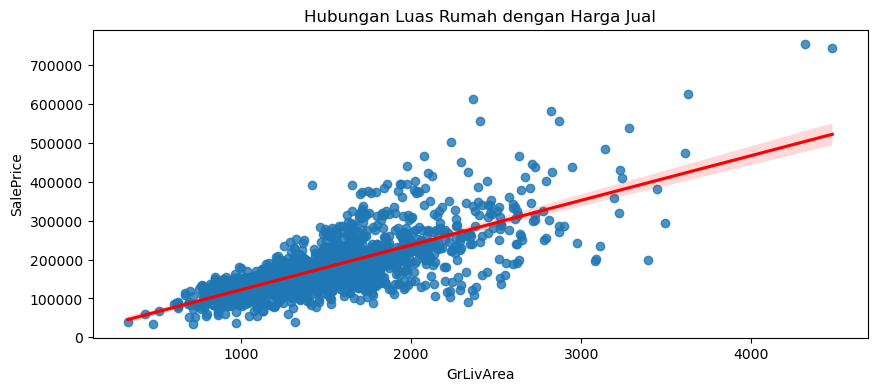

In [9]:
plt.figure(figsize=(10,4))

sns.regplot(x='GrLivArea', y='SalePrice', data=df, line_kws={'color':'red'})
plt.title('Hubungan Luas Rumah dengan Harga Jual')
plt.show()

Confidential intervalnya sudah agak baik, akan tetapi masih cukup tebal. Hal itu dikarenakan kualitas dari rumah tersebut pun bagus (warna kuning di plot sebelumya).

Heteroscedasticity Phenomenon: Semakin mahal rumahnya, semakin galau harganya.
Jika dilihat, dibagian kiri (dengan luas rumah yang relatif kecil), harga rumahnya seragam. Ketika rumahnya mahal, harganya variatif banget sehingga menyebabkan keraguan model (confidential interval yang tinggi).

## Correlation Matrix

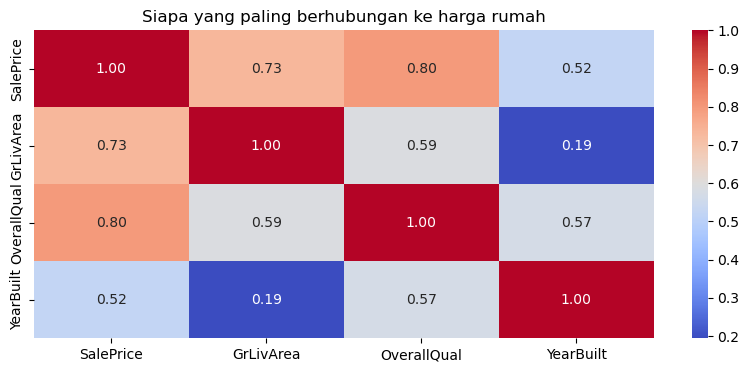

In [10]:
correlation = df.corr()

plt.figure(figsize=(10,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Siapa yang paling berhubungan ke harga rumah')
plt.show()

In [11]:
df.columns

Index(['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt'], dtype='object')

Ternyata, setelah diselidiki, Overall Qual alias kualitas memiliki korelasi yang cukup tinggi untuk pada SalePrice, yaitu sebesar 0.8, lalu disusuk debgab GrLivArea (yang tadi) dan YearBuild sebesar 0.52. Jadi, kalau ingin menaikkan harga, perbagus kualitas rumahnya, bukan perluas rumahnya.

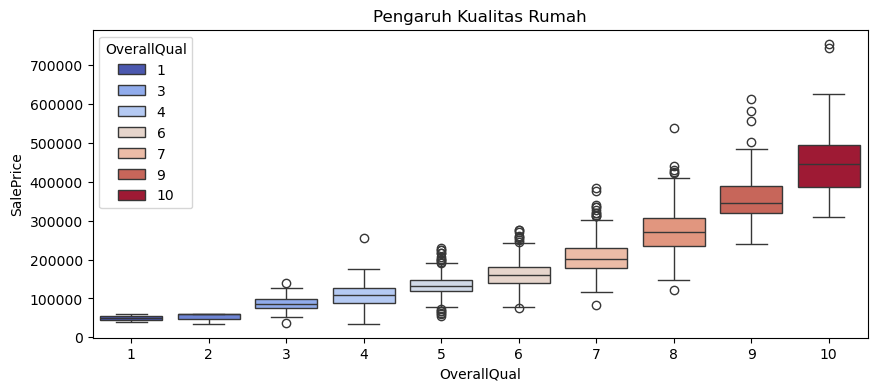

In [12]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='OverallQual', y='SalePrice', hue='OverallQual', palette='coolwarm')
plt.title('Pengaruh Kualitas Rumah')
plt.show()

Jika dilihat, semakin berkualitas rumah tersebut, semakin mahal harganya, dan semakin berani menjual dengan harga yang tinggi.

Akan tetapi, jika dilihat pada rating 4, ada 1 data yang lumayan jauh, bahkan diatas yang kualitasnya diatas ranking 4.

## Jendela Machine Learning

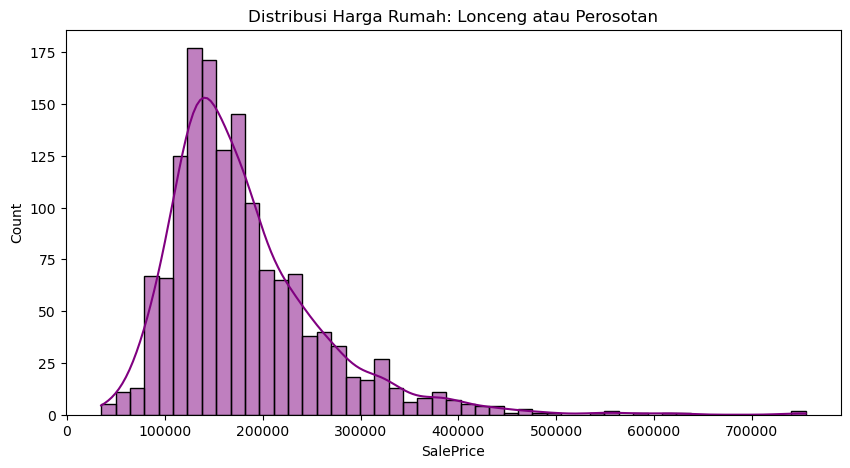

Nilai Skewness: 1.8812964895244009


In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], kde=True, color='purple')
plt.title('Distribusi Harga Rumah: Lonceng atau Perosotan')
plt.show()

print('Nilai Skewness:', df['SalePrice'].skew())

Dapat dilihat bahwa nilai distrubusi harga rumah terlalu miring ke kanan (dilihat dari grafik dan juga nilai skew yang > 1 - High Positive Skewness).

SOLUSI: gunakan logaritma (Log Transformation Magic)

### Log Transformation Magic

Sistem logaritma itu adil tapi kejam, dimana:
- Angka kecil cuma sedikit diubahnya.
- Angka besar bakal digencet habis-habisan jadi kecil. Hasilnya ekor panjang di kanan bakal ditarik ke tengah, dan kurvanya akan menjadi lonceng (normal). 

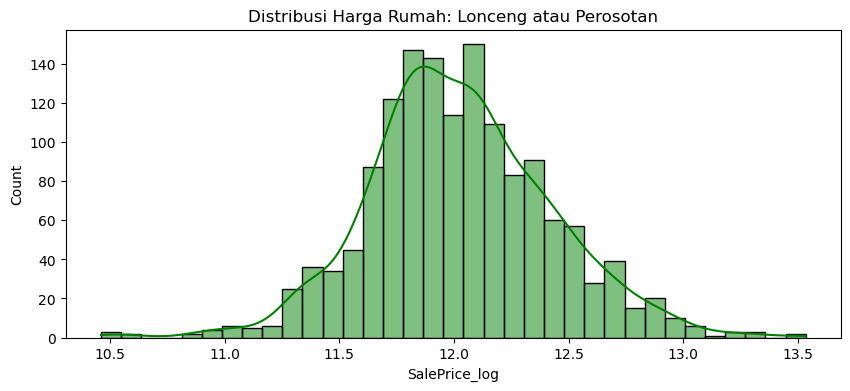

In [14]:
# 1. Terapkan Logaritma (np.log1p = log(1 + x) biar aman kalau ada angka 0)
df['SalePrice_log'] = np.log1p(df['SalePrice'])
plt.figure(figsize=(10,4))
sns.histplot(df['SalePrice_log'], kde=True, color='green')
plt.title('Distribusi Harga Rumah: Lonceng atau Perosotan')
plt.show()

## Model Machine Learning

### Split Data

In [15]:
df.columns

Index(['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt', 'SalePrice_log'], dtype='object')

In [16]:
X = df.drop(columns=['SalePrice', 'SalePrice_log'])
y = df['SalePrice_log']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Panggil otaknya
model=LinearRegression()

# Training
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

score= r2_score(y_test, y_pred)
print(f'R2: {score}')

R2: 0.8074345003701612


Prediksi untuk ke 4 column (3 train dan 1 test) sudah sangat bagus.

In [17]:
rumah_impian = pd.DataFrame({
    'GrLivArea' : [2500],
    'YearBuilt' : [2020],
    'OverallQual' : [8]
})

rumah_impian = rumah_impian[X.columns]

prediksi_log = model.predict(rumah_impian)

harga_asli = np.expm1(prediksi_log)

print(f"Prediksi Harga (Log): {prediksi_log[0]:.2f}")
print(f"Prediksi Harga Asli: ${harga_asli[0]:,.2f}")

Prediksi Harga (Log): 12.77
Prediksi Harga Asli: $349,851.81


Kalau bos tanya: "Oke modelmu akurat, tapi kalau dia salah tebak, melesetnya rata-rata berapa Rupiah/Dollar?" R2 Score nggak bisa jawab itu.

Saran Tambahan Code (Metric MAE)

### Mean Absolute Error (MAE)

Rata-rata model meleset sebesar: $23,313.80


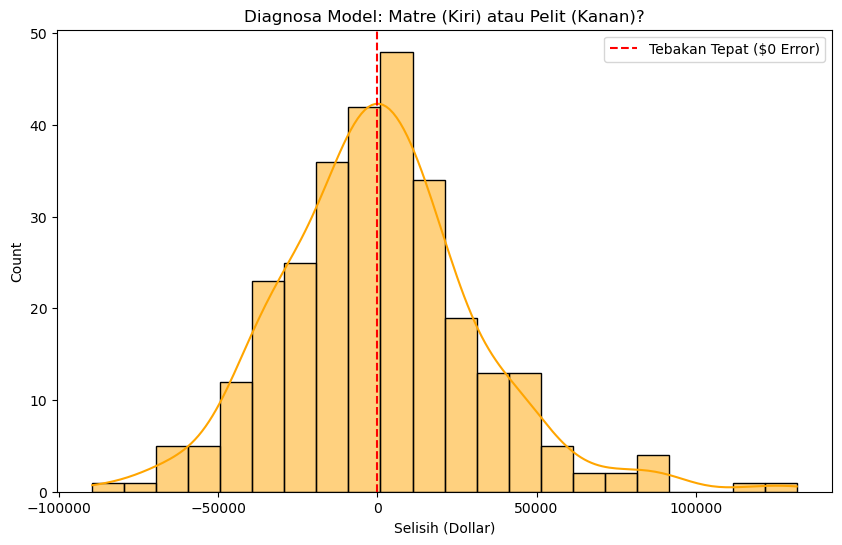

In [18]:
y_pred_asli = np.expm1(y_pred)
y_test_asli = np.expm1(y_test)

selisih = y_test_asli - y_pred_asli

mae = mean_absolute_error(y_test_asli, y_pred_asli)

print(f"Rata-rata model meleset sebesar: ${mae:,.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(selisih, kde=True, color='orange')
plt.axvline(0, color='red', linestyle='--', label='Tebakan Tepat ($0 Error)')

plt.title('Diagnosa Model: Matre (Kiri) atau Pelit (Kanan)?')
plt.xlabel('Selisih (Dollar)')
plt.legend()
plt.show()

Artinya, untuk model akan meleset kurang dari atau lebih dari 50000 dollar (sangat jarang), dan itu sangatlah sedikit bagi pembelian rumah.

# Latihan dengan data Test

In [19]:
data_test = pd.read_csv('../data/test.csv')
df_test = data_test[X.columns]
df_test.head()

,GrLivArea,OverallQual,YearBuilt
0,896,5,1961
1,1329,6,1958
2,1629,5,1997
3,1604,6,1998
4,1280,8,1992


## Mengisi NaN

In [20]:
X_submission = df_test[X.columns].fillna(df_test[X.columns].mean())

In [21]:
pred_log_submission = model.predict(X_submission)

real_price_submission = np.expm1(pred_log_submission)

print(f"Prediksi Harga (Log): {pred_log_submission[0]:.2f}")
print(f"Prediksi Harga Asli: ${real_price_submission[0]:,.2f}")

Prediksi Harga (Log): 11.65
Prediksi Harga Asli: $114,774.29


In [22]:
# Cek kembali
print(real_price_submission[:5])

[114774.28875042 148012.84913973 168521.98892416 188143.636413
 207190.64609669]


In [23]:
submission = pd.DataFrame({
    'Id' : data_test['Id'],
    'SalePrice' : real_price_submission
})

submission.head()

,Id,SalePrice
0,1461,114774.288750
1,1462,148012.849140
2,1463,168521.988924
3,1464,188143.636413
4,1465,207190.646097


In [24]:
# Simpan ke csv
submission.to_csv('hasil_predict.csv', index=False)

# Penambahan 1 kolom (Neighborhood)

In [27]:
features = ['GrLivArea', 'OverallQual', 'YearBuilt', 'Neighborhood']

In [31]:
X_train_raw = df_train[features]
X_test_raw = data_test[features]

## One Encoded

In [32]:
X_train_encoded = pd.get_dummies(X_train_raw)
X_test_encoded = pd.get_dummies(X_test_raw)

In [37]:
X_test_final = X_test_encoded.reindex(columns = X_train_encoded.columns, fill_value=0)

In [35]:
print(f"Jumlah Kolom Sekarang: {X_train_encoded.shape[1]} (Tadinya cuma 3 kan?)")
X_train_encoded.head()

Jumlah Kolom Sekarang: 28 (Tadinya cuma 3 kan?)


,GrLivArea,OverallQual,YearBuilt,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1710,7,2003,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1262,6,1976,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1786,7,2001,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1717,7,1915,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2198,8,2000,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [40]:
# 1. Target (Harganya kita Log dulu kayak kemarin)
y_train_log = np.log1p(df_train['SalePrice'])

# 2. Panggil Otak Baru
model_lokasi = LinearRegression()

# 3. Latih dengan Data yang Lebih Pinter (Pake Lokasi!)
model_lokasi.fit(X_train_encoded, y_train_log)

# 4. Prediksi Data Test (Soal Ujian)
pred_log_new = model_lokasi.predict(X_test_final)

# 5. Balikin ke Harga Asli
pred_price_new = np.expm1(pred_log_new)

# 6. Bikin File Submission Baru
submission_v2 = pd.DataFrame({
    'Id': data_test['Id'],
    'SalePrice': pred_price_new
})

submission_v2.to_csv('submission_pake_lokasi.csv', index=False)

# Tambah 3 kolom lagi!

In [41]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [42]:
features2 = ['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageCars', 'FullBath', 'Neighborhood', 'KitchenQual']

X_train_v3 = df_train[features2].copy()
X_test_v3 = data_test[features2].copy()

In [44]:
X_train_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GrLivArea     1460 non-null   int64 
 1   OverallQual   1460 non-null   int64 
 2   YearBuilt     1460 non-null   int64 
 3   GarageCars    1460 non-null   int64 
 4   FullBath      1460 non-null   int64 
 5   Neighborhood  1460 non-null   object
 6   KitchenQual   1460 non-null   object
dtypes: int64(5), object(2)
memory usage: 80.0+ KB


In [48]:
# Untuk kolom angka, cek apakah ada missing values
print(X_train_v3.isnull().sum().sum())
print(X_test_v3.isnull().sum().sum())

0
2


In [49]:
X_test_v3.isnull().sum()

GrLivArea       0
OverallQual     0
YearBuilt       0
GarageCars      1
FullBath        0
Neighborhood    0
KitchenQual     1
dtype: int64

In [52]:
# Kalau Garasi/Kamar Mandi kosong, anggap aja 0.
null_cols = ['GarageCars', 'FullBath']
X_test_v3[null_cols] = X_test_v3[null_cols].fillna(0)

Karena tidak ada, maka kita sudah bisa melanjutkan ke tahap selanjutnya:
1. ONE-HOT Encoded untuk data bertipe category.
2. Modelling lagi dengan linear regression dan lihat hasil predictnya.

## ONE_HOT ENCODED

In [54]:
X_train_encoded_v3 = pd.get_dummies(X_train_v3)
X_test_encoded_v3 = pd.get_dummies(X_test_v3)

In [55]:
# Samakan kolom
X_test_final_v3 = X_test_encoded_v3.reindex(columns = X_train_encoded_v3.columns, fill_value=0)

## Modelling

In [56]:
# Harus selalu memanggil otak baru
model_v3 = LinearRegression()

# Training
model_v3.fit(X_train_encoded_v3, y_train_log)

# Predict
pred_log_v3 = model_v3.predict(X_test_final_v3)
pred_price_v3 = np.expm1(pred_log_v3)

submission_v3 = pd.DataFrame({
    'Id' : data_test['Id'],
    'SalePrice' : pred_price_v3
})

submission_v3.to_csv('submission_v3_komplit.csv', index=False)

# Switch To Random Forest

In [59]:
# Inisialisasi
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_encoded_v3, y_train_log)

pred_log_rf = rf_model.predict(X_test_final_v3)
pred_price_rf = np.expm1(pred_log_rf)

submission_rf = pd.DataFrame({
    'Id': data_test['Id'],
    'SalePrice': pred_price_rf
})

submission_rf.to_csv('Submission_Random_Forest.csv', index=False)

# Ensemble Averaging (Fusion)

In [60]:
final_pred = (0.6 * pred_price_v3) + (0.4 * pred_price_rf)

submission_fusion = pd.DataFrame({
    'Id': data_test['Id'],
    'SalePrice': final_pred
})

filename_fusion = 'submission_fusion.csv'
submission_fusion.to_csv(filename_fusion, index=False)

# Requirements

In [ ]:
# !pip install pipreqsnb

In [ ]:
# !pipreqsnb . --force